In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv('E:/nfmk/Algae_Analysis_Kaggle Data/algea.csv')

# Selecting features and target variable
X = df.drop(['Population'], axis=1)  # Features
y = df['Population']  # Target

# Standardization
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = y.values.reshape(-1, 1)  # Reshape for scaling
y = scaler_y.fit_transform(y).flatten()  # Flatten to 1D array

# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=4, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine (SVR)": SVR(kernel='rbf'),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(50,50), max_iter=500, random_state=42)
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Convert predictions back to original scale
    y_test_original = scaler_y.inverse_transform(y_test.reshape(-1,1))
    y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1,1))

    # Compute metrics
    mse = mean_squared_error(y_test_original, y_pred_original)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_original, y_pred_original)
    r2 = r2_score(y_test_original, y_pred_original)
    
    # Store results
    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R² Score": r2}

# Convert results to DataFrame and print
results_df = pd.DataFrame(results).T
print(results_df)




                                       MSE         RMSE          MAE  R² Score
Linear Regression             2.168330e+06  1472.524983  1260.738041 -0.001323
Decision Tree                 1.504793e+05   387.916661   316.195055  0.930509
Random Forest                 9.207273e+04   303.434878   258.746031  0.957481
Support Vector Machine (SVR)  1.037747e+05   322.140879   269.936566  0.952077
Gradient Boosting             8.556700e+04   292.518374   251.885883  0.960486
Neural Network                9.730170e+04   311.932207   263.634873  0.955067


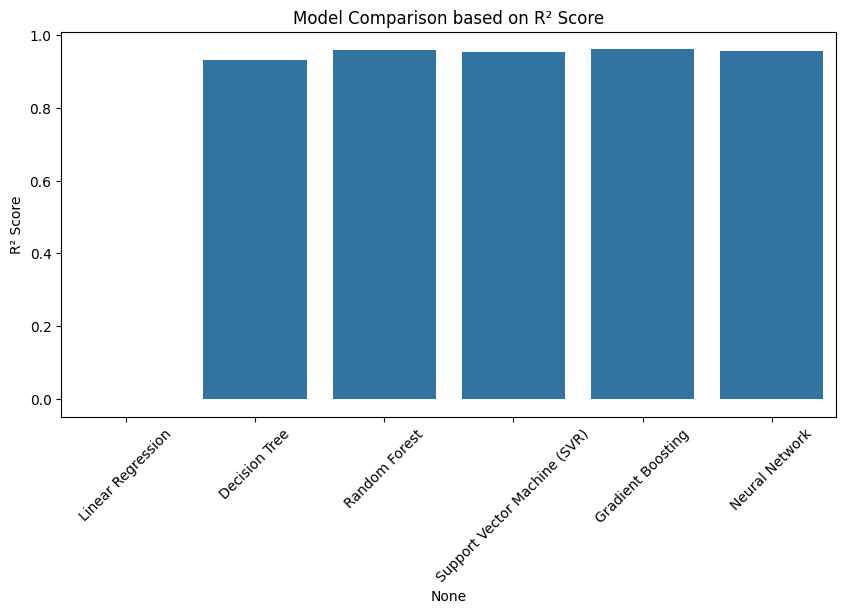

In [6]:
# Plot Model Performance
plt.figure(figsize=(10,5))
sns.barplot(x=results_df.index, y=results_df["R² Score"])
plt.xticks(rotation=45)
plt.title("Model Comparison based on R² Score")
plt.ylabel("R² Score")
plt.show()